# Train model

In [39]:
import matplotlib.pyplot as plt
import pylab
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import load_model
from keras import optimizers
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm

from ipynb.fs.full.classifier_definitions import classifier1
from ipynb.fs.full.data_functions import convert

In [3]:
# load stage 1 test data as extra training set (avoid catastrophic forgetness)
# already normalized but thats probably ok
f_path = 'training_data/2A/stage1_test_X.txt'
X1 = pd.read_csv(f_path)
X1 = X1.drop(X1.columns[0],axis = 1)
X1 = X1.drop(0,axis = 0)

f_path = 'training_data/2A/stage1_test_y.txt'
y1 = pd.read_csv(f_path)
y1 = y1.drop(y1.columns[0],axis = 1)
y1 = y1.drop(0,axis = 0)

In [13]:
# load stage 2 data
f_path = 'training_data/2A/y.txt'
y = pd.read_csv(f_path)
y = y.drop(y.columns[0],axis = 1)
y = y.drop(0,axis = 0)

f_path = 'training_data/2A/X.txt'
X = pd.read_csv(f_path)
X = X.drop(X.columns[0],axis = 1)
X = X.drop(0,axis = 0)


In [20]:
# append stage 1 and 2 data
yy = pd.concat([y, y1],axis=0,ignore_index=True)
XX = pd.concat([X, X1],axis=0,ignore_index=True)

In [78]:
# Normalize data
X_t = XX.transpose()
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_t)
X_scaled = pd.DataFrame(X_scaled.transpose())

# Train test split with sklearn
Xtrain,Xtest,ytrain,ytest = train_test_split(X_scaled.values,yy.values,test_size=0.1,random_state=13,stratify=yy)

In [79]:
# Reshape data
X_train = []
for i in np.arange(len(Xtrain)):
    h = Xtrain[i].reshape(4096,1)
    X_train.append(h)
X_train = np.asarray(X_train)

X_test = []
for i in np.arange(len(Xtest)):
    h = Xtest[i].reshape(4096,1)
    X_test.append(h)
X_test = np.asarray(X_test)

# one hot code y
y_train = to_categorical(ytrain)
y_test = to_categorical(ytest)

In [24]:
# Check model accuracy before continue training

model = load_model("stage1_trialB.h5")
score = model.evaluate(X_test, y_test, verbose=1)
print('Test loss 1:', score[0])
print('Test accuracy 1:', score[1])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
1183/1183 [==============================] - 4s 3ms/step
Test loss 1: 0.6256804735974872
Test accuracy 1: 0.9459002536429456


In [25]:
# Continue train stage1_trialB.h5
epoch = 15
batch_size = 10

model.fit(X_train, y_train,batch_size=batch_size,epochs=epoch,verbose=1)
score = model.evaluate(X_test, y_test, verbose=1)
print('Test loss 2:', score[0])
print('Test accuracy 2:', score[1])

Epoch 1/15
10641/10641 [==============================] - 98s 9ms/step - loss: 0.0830 - acc: 0.9745
Epoch 2/15
10641/10641 [==============================] - 92s 9ms/step - loss: 0.0415 - acc: 0.9851
Epoch 3/15
10641/10641 [==============================] - 87s 8ms/step - loss: 0.0359 - acc: 0.9881
Epoch 4/15
10641/10641 [==============================] - 87s 8ms/step - loss: 0.0322 - acc: 0.9895
Epoch 5/15
10641/10641 [==============================] - 89s 8ms/step - loss: 0.0254 - acc: 0.9929
Epoch 6/15
10641/10641 [==============================] - 89s 8ms/step - loss: 0.0262 - acc: 0.9929
Epoch 7/15
10641/10641 [==============================] - 87s 8ms/step - loss: 0.0225 - acc: 0.9936
Epoch 8/15
10641/10641 [==============================] - 2296s 216ms/step - loss: 0.0142 - acc: 0.9957
Epoch 9/15
10641/10641 [==============================] - 97s 9ms/step - loss: 0.0277 - acc: 0.9945
Epoch 10/15
10641/10641 [==============================] - 104s 10ms/step - loss: 0.0140 - acc: 

In [76]:
# Save model
model.save('stage2_trialA.h5')  # creates a HDF5 file 

In [81]:
# Include the test set in stage2 training to avoid catastrophic forgetness
X_test_df = pd.DataFrame(Xtest)
f_path = 'training_data/2B/2A_test_X.txt'
X_test_df.to_csv(f_path)
y_test_df = pd.DataFrame(ytest)
f_path = 'training_data/2B/2A_test_y.txt'
y_test_df.to_csv(f_path)

# See probability distribution of predictions on Xtest

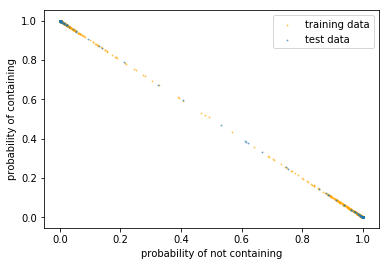

In [71]:
result_test = model.predict(X_test)
neg1 = result_test[0:,0] #first column
pos1 = result_test[0:,1] #second column

result_train = model.predict(X_train)
neg2 = result_train[0:,0] #first column
pos2 = result_train[0:,1] #second column

plt.scatter(neg2, pos2, s=1, color = 'orange',alpha=0.5, label = 'training data')
plt.scatter(neg1, pos1, s=1, alpha=0.5, label = 'test data')

plt.xlabel("probability of not containing")
plt.ylabel("probability of containing")
plt.legend(loc='upper right')
plt.show()

# look into test set

The following results show that the initial phase of gravitational wave is easy to be mixed up with sinusoids or seesaw. But in real applications its not going to be a huge issue because the merge signal is always stronger

However, in general it seems like when waveform has high frequency, the net cannot really tell. like gausepulse.


  0%|          | 0/1183 [00:00<?, ?it/s]


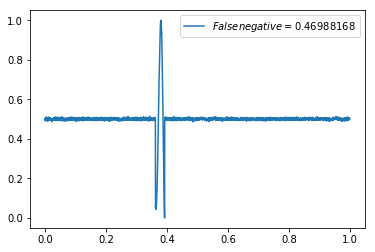

  0%|          | 0/1183 [00:00<?, ?it/s]

False negative:  1


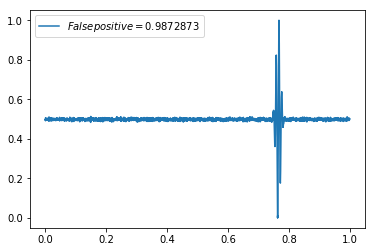

 29%|██▉       | 348/1183 [00:00<00:00, 860.49it/s]

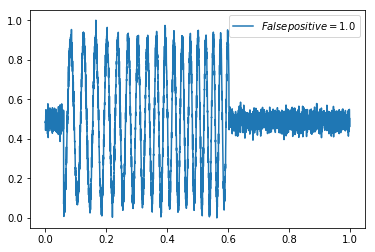

100%|██████████| 1183/1183 [00:00<00:00, 1413.67it/s]

False positive:  2


In [73]:
# find wrong predictions in test set

false_negative = 0
for i in tqdm(range(len(pos1))):
    if pos1[i] < 0.5 and ytest[i][0]==1:
        false_negative += 1
        falneg_wf = convert(Xtest[i])
        pylab.plot(falneg_wf.sample_times, falneg_wf, 
                   label = '$False negative = %s$'%pos1[i])
        pylab.legend()
        pylab.show()
        
print("False negative: ", false_negative)


false_positive = 0
for i in tqdm(range(len(pos1))):
    if pos1[i] > 0.5 and ytest[i][0]==0:
        false_positive += 1
        falpos_wf = convert(Xtest[i])
        pylab.plot(falpos_wf.sample_times, falpos_wf, 
                   label = '$False positive = %s$'%pos1[i])
        pylab.legend()
        pylab.show()
        
print("False positive: ", false_positive)

  0%|          | 0/1183 [00:00<?, ?it/s]

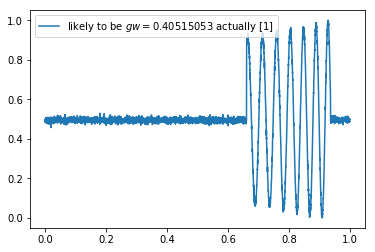

  9%|▉         | 104/1183 [00:01<00:17, 61.61it/s]

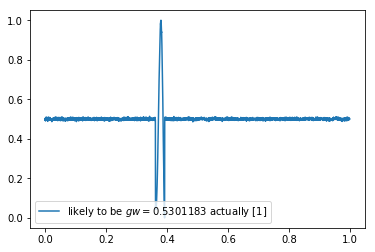

100%|██████████| 1183/1183 [00:02<00:00, 447.93it/s]

2


In [66]:
# find the ones that the model is unsure of

uncertain_count = 0
for i in tqdm(range(len(pos1))):
    if pos1[i] > 0.4 and pos1[i] < 0.6:
        uncertain_count += 1
        unsure_wf = convert(Xtest[i])
        pylab.plot(unsure_wf.sample_times, unsure_wf, 
                   label = 'likely to be '+'$gw=%s$'%pos1[i] + ' actually '+ str(ytest[i]))
        pylab.legend()
        pylab.show()

print("uncertained: ", uncertain_count)

# look into training set

  0%|          | 0/10641 [00:00<?, ?it/s]

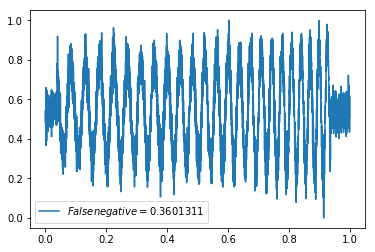

  0%|          | 0/10641 [00:00<?, ?it/s]

False negative:  1


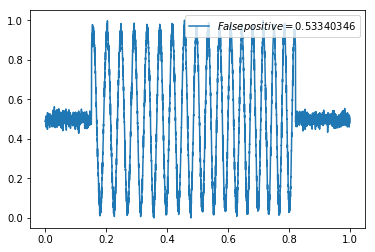

 29%|██▉       | 3072/10641 [00:00<00:01, 6647.14it/s]

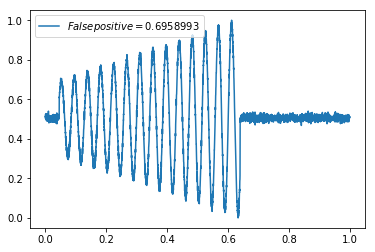

 45%|████▍     | 4776/10641 [00:00<00:01, 5493.28it/s]

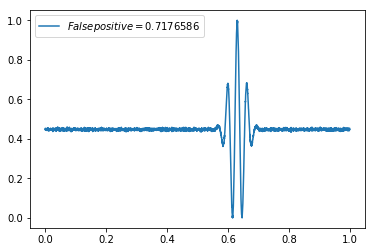

 57%|█████▋    | 6020/10641 [00:01<00:01, 4186.49it/s]

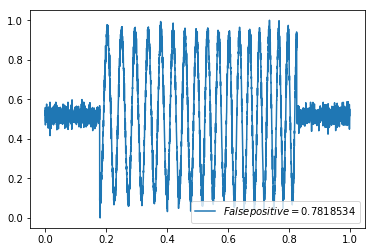

 69%|██████▊   | 7300/10641 [00:01<00:00, 3817.98it/s]

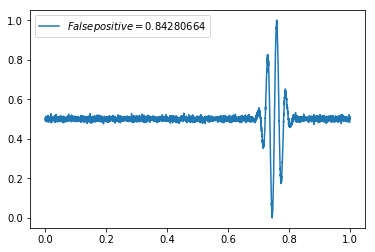

 72%|███████▏  | 7714/10641 [00:02<00:01, 1995.68it/s]

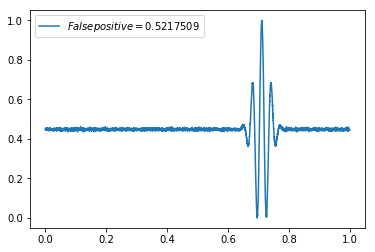

100%|██████████| 10641/10641 [00:02<00:00, 4114.35it/s]

False positive:  6


In [74]:
# find wrong predictions in training set

false_negative_train = 0
for i in tqdm(range(len(pos2))):
    if pos2[i] < 0.5 and ytrain[i][0]==1:
        false_negative_train += 1
        falneg_wf = convert(Xtrain[i])
        pylab.plot(falneg_wf.sample_times, falneg_wf, 
                   label = '$False negative = %s$'%pos2[i])
        pylab.legend()
        pylab.show()
        
print("False negative: ", false_negative_train)


false_positive_train = 0
for i in tqdm(range(len(pos2))):
    if pos2[i] > 0.5 and ytrain[i][0]==0:
        false_positive_train += 1
        falpos_wf = convert(Xtrain[i])
        pylab.plot(falpos_wf.sample_times, falpos_wf, 
                   label = '$False positive = %s$'%pos2[i])
        pylab.legend()
        pylab.show()
        
print("False positive: ", false_positive_train)

The frequency for easy to mix up ones: 0.075, 0.0323, 0.0363,0.0387

  0%|          | 0/10641 [00:00<?, ?it/s]

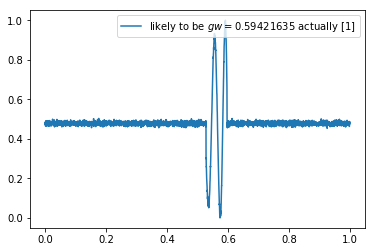

 28%|██▊       | 2977/10641 [00:00<00:01, 6028.90it/s]

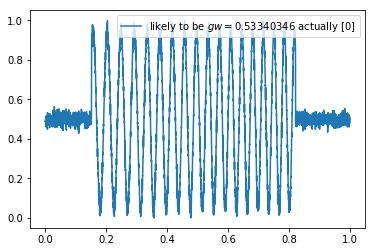

 30%|██▉       | 3158/10641 [00:00<00:06, 1078.93it/s]

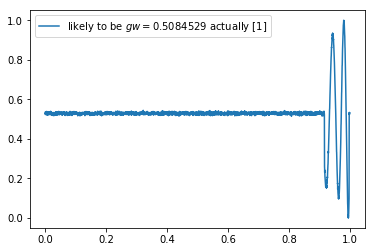

 54%|█████▍    | 5725/10641 [00:01<00:03, 1420.50it/s]

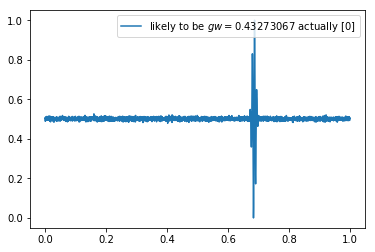

 84%|████████▍ | 8944/10641 [00:01<00:00, 1859.89it/s]

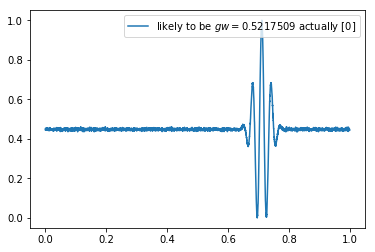

100%|██████████| 10641/10641 [00:02<00:00, 4596.93it/s]

uncertained:  5


In [75]:
# find the ones that the model is unsure of

uncertain_count_train = 0
for i in tqdm(range(len(pos2))):
    if pos2[i] > 0.4 and pos2[i] < 0.6:
        uncertain_count_train += 1
        unsure_wf = convert(Xtrain[i])
        pylab.plot(unsure_wf.sample_times, unsure_wf, 
                   label = 'likely to be '+'$gw=%s$'%pos2[i] + ' actually '+ str(ytrain[i]))
        pylab.legend()
        pylab.show()

print("uncertained: ", uncertain_count_train)